In [17]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /anaconda3/lib/python3.7/site-packages (0.9.0)
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Pokemon.csv')
df.shape

(800, 13)

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### MongoDB thinks a period implies a sublevel. 'Sp. Atk' and 'Sp. Def' are converted into {'Sp': {'Atk', 'Def'}}. So remove the period.

In [5]:
df = df.rename(columns={'Sp. Atk': 'Sp Atk', 'Sp. Def': 'Sp Def'})

In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp Atk         int64
Sp Def         int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [8]:
df.Name = df.Name.str.strip()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
df['Type 1'] = df['Type 1'].str.strip()
df['Type 2'] = df['Type 2'].str.strip()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp Atk          0
Sp Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [11]:
df = df.fillna('')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False


In [12]:
df.to_csv('./Pokemon_cleaned.csv', index=False)

In [13]:
df.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [50]:
pokemon_type_counts = df.groupby(['Type 1', 'Type 2']).Name.count()
pokemon_type_counts = pokemon_type_counts.unstack().fillna(0)
pokemon_type_counts

Type 2,,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,17.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,14.0,1.0,6.0,2.0,0.0,0.0,12.0,0.0,3.0,7.0,1.0
Dark,10.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,11.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
Electric,27.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
Fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
Fire,28.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0
Flying,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,10.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [ ]:
pokemon_type_counts

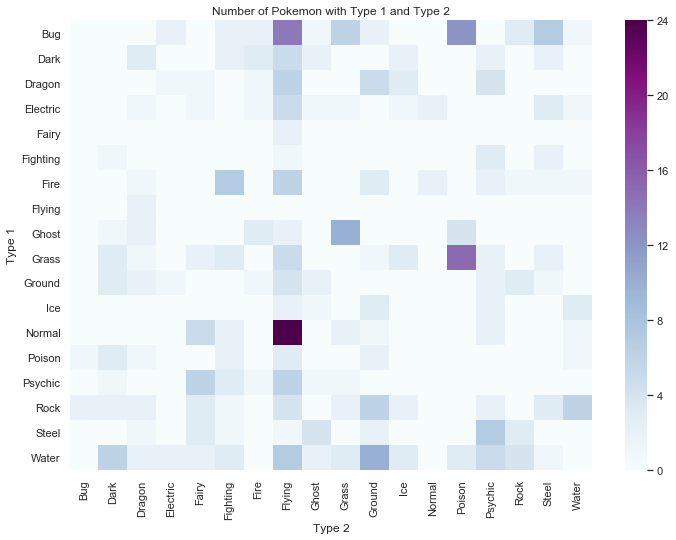

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pd.DataFrame(pokemon_type_counts).iloc[:,1:], cmap='BuPu');
plt.title('Number of Pokemon with Type 1 and Type 2');